# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
n=500
 # I wanted a larger sample but for some reason the code breaks later when I attempt to  print out the dataframe and I couldn't identify where the issue was
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=n)
lngs = np.random.uniform(low=-180.000, high=180.000, size=n)
lat_lngs = [(lats[i],lngs[i]) for i in range(len(lats))]

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(lat_lng[0],lat_lng[1])
    # If the city is unique, then add it to a our cities list
    cities.append(city)

# Print the city count to confirm sufficient count
# print(type(lat_lngs))
# len(cities)
# cities

# for i in lat_lngs:
#     print(i)
print(len(cities))

-74.2024337415821 -58.74899411982743
-13.186895186614052 -138.78394197328566
-82.77066100586725 -138.558471703237
47.90282694505089 -155.35134957187722
7.776597508740565 -94.37613844481933
-22.606665827394636 -101.28507194179099
-41.610811499873314 109.61896856277917
38.754144225835944 161.79216369170507
-31.169159219876484 -59.46727190852155
76.42681960884656 -115.82926560674646
-17.20500214707299 71.6753886205085
77.58299388375417 25.119255151146092
38.33194698394698 51.59153313552733
-19.1401409210728 -161.2970812402608
-27.05347083276279 -49.59603587058277
75.40343068315033 -76.22623596715015
78.85657809241954 -172.84935566660153
71.77323752341556 84.84286441769132
52.8451683966465 109.39674061608969
58.55546559972598 -45.257204978278025
-88.99111294518605 -112.54768714775456
40.1838299816111 -9.885495092355086
-32.075202726884854 -69.05076478814678
10.127201294807577 163.32331870871843
34.63821936072944 -32.2877362992993
-44.71482587472116 -159.00091119026405
-19.91275135591266 0.

57.54423021786121 26.556255632911984
13.161661948525904 153.1057181375432
-51.861787383536516 -155.09010418337468
-81.692517348828 -31.13648849403026
3.190018525134036 -32.86366909853098
83.7474427449101 36.76304572426898
42.01598992915169 129.67728381699584
56.55228553192947 -153.40619925385386
-10.26285503098623 67.65287893012064
9.509615256009525 6.487875357578048
-52.65593530896977 -159.42282682960482
11.020021686299728 42.616518500171736
-48.0806730055565 137.17577943405314
-55.30141710002182 -54.20003513178328
84.48148805294704 166.7112942648758
2.0611378739302495 85.05791113988295
-36.83660213672336 -120.29846415770535
84.06048190094299 105.233965728832
-23.380112180172404 -47.25997763449638
57.89546415467214 31.62523512622255
67.9792996215948 85.0133694715775
89.72136355243651 -174.4519100878521
46.68122211989359 49.47718414248109
50.89196148812806 96.45459877083618
61.925024779895296 -78.1302550293985
-89.28184332362247 69.47331948509171
57.69006126792732 -40.62880590237913
28

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
data=[]
wind_speed = []
Date = []
High = []
Humidity = []
Country = []
Cloudiness = []
Lat = []
Lon = []


for t in lat_lngs:
    lat,long=t
    target_url = ('https://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&appid=0a6092dbbcf7dacfa0a9b0ae38fc203f').format(lat,long)
    d=requests.get(target_url).json()
    mph=d.get('wind').get('speed')
    day=d.get('dt')
    maximum=d.get('main').get('temp_max')
    humid=d.get('main').get('humidity')
    abbreviation=d.get('sys').get('country')
    cloudies=d.get('clouds').get('all')
    latitude=d.get('coord').get('lat')
    longitude=d.get('coord').get('lon')
    
    
#     print(d)
#     print("\n\n\n\n\n\n")
    data.append(d)
    wind_speed.append(mph)
    Date.append(day)
    High.append(maximum)
    Humidity.append(humid)
    Country.append(abbreviation)
    Cloudiness.append(cloudies)
    Lat.append(latitude)
    Lon.append(longitude)
    


In [54]:
data[0]

{'coord': {'lon': -58.75, 'lat': -74.2},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 260.473,
  'pressure': 995.75,
  'humidity': 69,
  'temp_min': 260.473,
  'temp_max': 260.473,
  'sea_level': 995.72,
  'grnd_level': 995.75},
 'wind': {'speed': 2.31, 'deg': 200.001},
 'clouds': {'all': 0},
 'dt': 1547951562,
 'sys': {'message': 0.0034, 'sunrise': 0, 'sunset': 0},
 'id': 0,
 'name': '',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
df_raw = pd.DataFrame.from_records(data)

df_raw



,base,clouds,cod,coord,dt,id,main,name,rain,snow,sys,visibility,weather,wind
0,stations,{'all': 0},200,"{'lon': -58.75, 'lat': -74.2}",1547951562,0,"{'temp': 260.473, 'pressure': 995.75, 'humidit...",,NaN,NaN,"{'message': 0.0034, 'sunrise': 0, 'sunset': 0}",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2.31, 'deg': 200.001}"
1,stations,{'all': 88},200,"{'lon': -138.78, 'lat': -13.19}",1547951562,0,"{'temp': 299.923, 'pressure': 1024.85, 'humidi...",,{'3h': 0.285},NaN,"{'message': 0.0032, 'sunrise': 1547996569, 'su...",NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 6.96, 'deg': 91.5008}"
2,stations,{'all': 24},200,"{'lon': -138.56, 'lat': -82.77}",1547951562,0,"{'temp': 259.223, 'pressure': 934.55, 'humidit...",,NaN,NaN,"{'message': 0.0067, 'sunrise': 0, 'sunset': 0}",NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 3.91, 'deg': 347.501}"
3,stations,{'all': 64},200,"{'lon': -155.35, 'lat': 47.9}",1547951563,0,"{'temp': 278.448, 'pressure': 1019.26, 'humidi...",,NaN,NaN,"{'message': 0.0087, 'sunrise': 1548007316, 'su...",NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 2.41, 'deg': 228.001}"
4,stations,{'all': 68},200,"{'lon': -94.38, 'lat': 7.78}",1547951563,0,"{'temp': 299.348, 'pressure': 1024.77, 'humidi...",,NaN,NaN,"{'message': 0.0035, 'sunrise': 1547987782, 'su...",NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 7.16, 'deg': 65.5008}"
5,stations,{'all': 48},200,"{'lon': -101.29, 'lat': -22.61}",1547951564,0,"{'temp': 295.573, 'pressure': 1032.71, 'humidi...",,NaN,NaN,"{'message': 0.004, 'sunrise': 1547986631, 'sun...",NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 7.96, 'deg': 121.001}"
6,stations,{'all': 92},200,"{'lon': 109.62, 'lat': -41.61}",1547951564,0,"{'temp': 286.798, 'pressure': 1024.2, 'humidit...",,{'3h': 1.3},NaN,"{'message': 0.0027, 'sunrise': 1547933451, 'su...",NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 2.31, 'deg': 268.001}"
7,stations,{'all': 68},200,"{'lon': 161.79, 'lat': 38.75}",1547951564,0,"{'temp': 282.398, 'pressure': 1006.61, 'humidi...",,NaN,NaN,"{'message': 0.0053, 'sunrise': 1547929662, 'su...",NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 21.51, 'deg': 288.001}"
8,stations,{'all': 0},200,"{'lon': -59.47, 'lat': -31.17}",1547951565,3435966,"{'temp': 290.723, 'pressure': 1026.15, 'humidi...",Bovril,NaN,NaN,"{'message': 0.005, 'country': 'AR', 'sunrise':...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 4.01, 'deg': 97.0008}"
9,stations,{'all': 0},200,"{'lon': -115.83, 'lat': 76.43}",1547951565,6079446,"{'temp': 238.423, 'pressure': 1026.8, 'humidit...",Mould Bay,NaN,NaN,"{'message': 0.0037, 'country': 'CA', 'sunrise'...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 1.66, 'deg': 54.5008}"


In [62]:


# df_raw['City'] = cities
df_raw['City'] = cities 
df_raw['Cloudiness'] = Cloudiness
df_raw['Country'] = Country
df_raw['Date'] = Date
df_raw['Humidity'] = Humidity
df_raw['Lat'] = Lat
df_raw['Lng'] = Lon
df_raw['Max Temp'] = High
df_raw['Wind Speed'] = wind_speed




df_raw['Wind Speed'] = wind_speed

df_raw

df_new = df_raw[['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp', 'Wind Speed']]
df_new.drop_duplicates(subset='City', keep='first',inplace=True)





/Users/ehamilton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
Date
actual_date = pd.to_datetime(df_new['Date'])
actual_date

0     1970-01-01 00:00:01.547951562
1     1970-01-01 00:00:01.547951562
2     1970-01-01 00:00:01.547951562
3     1970-01-01 00:00:01.547951563
4     1970-01-01 00:00:01.547951563
5     1970-01-01 00:00:01.547951564
6     1970-01-01 00:00:01.547951564
7     1970-01-01 00:00:01.547951564
8     1970-01-01 00:00:01.547951565
9     1970-01-01 00:00:01.547951565
10    1970-01-01 00:00:01.547951566
11    1970-01-01 00:00:01.547951566
12    1970-01-01 00:00:01.547951567
13    1970-01-01 00:00:01.547951567
14    1970-01-01 00:00:01.547951567
15    1970-01-01 00:00:01.547951568
16    1970-01-01 00:00:01.547951568
17    1970-01-01 00:00:01.547951569
18    1970-01-01 00:00:01.547951569
19    1970-01-01 00:00:01.547951569
20    1970-01-01 00:00:01.547951570
21    1970-01-01 00:00:01.547951570
22    1970-01-01 00:00:01.547951571
23    1970-01-01 00:00:01.547951571
24    1970-01-01 00:00:01.547951572
25    1970-01-01 00:00:01.547951572
26    1970-01-01 00:00:01.547951573
27    1970-01-01 00:00:01.54

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temerature (01-01-1970)')

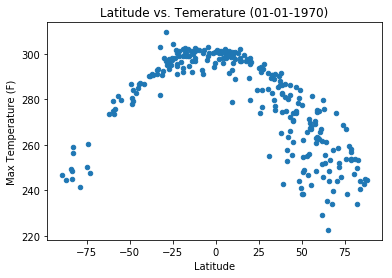

In [64]:
df_new.plot.scatter("Lat", "Max Temp")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs. Temerature (01-01-1970)')

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity (01-01-1970)')

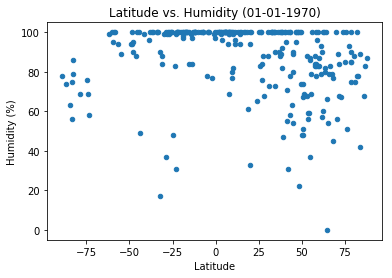

In [65]:
df_new.plot.scatter("Lat", "Humidity")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (01-01-1970)')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness (01-01-1970)')

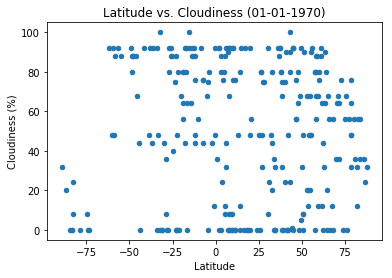

In [66]:
df_new.plot.scatter("Lat", "Cloudiness")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (01-01-1970)')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed (01-01-1970)')

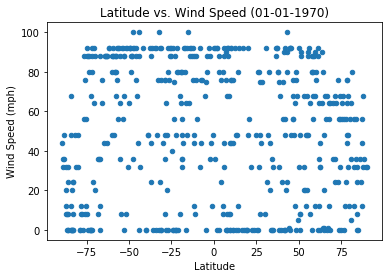

In [61]:
df_new.plot.scatter("Lat", "Cloudiness")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (01-01-1970)')

Observations:

-As expected, the closer the lat to 0 the warmer the Temps
-Lat does not appear to have much of an effect on Humidity, except between -75 and -50 but it doesnt really appear to be super significant
-Clouds and wind just kind of do what they want but seem closely related 